In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
word_data = pd.read_csv('word_data_with_size.csv')

In [3]:
word_data

,image_file_name,sex,age,age_range,word,word_len,width,height,aspect_ratio
0,IMG_OCR_53_4PR_09305_1.png,female,41,40s,강원도,3,186,66,2.818182
1,IMG_OCR_53_4PR_09305_2.png,female,41,40s,경상북도,4,235,69,3.405797
2,IMG_OCR_53_4PR_09305_3.png,female,41,40s,경기도,3,181,62,2.919355
3,IMG_OCR_53_4PR_09305_4.png,female,41,40s,인제군,3,157,64,2.453125
4,IMG_OCR_53_4PR_09305_5.png,female,41,40s,영광군,3,162,65,2.492308
...,...,...,...,...,...,...,...,...,...
462888,IMG_OCR_53_4PR_99941_28.png,male,22,20s,서운면,3,177,85,2.082353
462889,IMG_OCR_53_4PR_99941_29.png,male,22,20s,복세편살,4,246,94,2.617021
462890,IMG_OCR_53_4PR_99941_30.png,male,22,20s,버카충,3,181,80,2.262500
462891,IMG_OCR_53_4PR_99941_31.png,male,22,20s,별다줄,3,191,81,2.358025


## 분포 알아보기

In [4]:
static_df = pd.DataFrame(columns=['2_word_width', '2_word_height', '2_word_aspect_ratio',
                                  '3_word_width', '3_word_height', '3_word_aspect_ratio', 
                                  '4_word_width', '4_word_height', '4_word_aspect_ratio'])

In [5]:
static_df['2_word_width'] = word_data[word_data['word_len'] == 2]['width'].describe()
static_df['2_word_height'] = word_data[word_data['word_len'] == 2]['height'].describe()
static_df['2_word_aspect_ratio'] = word_data[word_data['word_len'] == 2]['aspect_ratio'].describe()

static_df['3_word_width'] = word_data[word_data['word_len'] == 3]['width'].describe()
static_df['3_word_height'] = word_data[word_data['word_len'] == 3]['height'].describe()
static_df['3_word_aspect_ratio'] = word_data[word_data['word_len'] == 3]['aspect_ratio'].describe()

static_df['4_word_width'] = word_data[word_data['word_len'] == 4]['width'].describe()
static_df['4_word_height'] = word_data[word_data['word_len'] == 4]['height'].describe()
static_df['4_word_aspect_ratio'] = word_data[word_data['word_len'] == 4]['aspect_ratio'].describe()

In [6]:
static_df

,2_word_width,2_word_height,2_word_aspect_ratio,3_word_width,3_word_height,3_word_aspect_ratio,4_word_width,4_word_height,4_word_aspect_ratio
count,112475.000000,112475.000000,112475.000000,255482.000000,255482.000000,255482.000000,94936.000000,94936.000000,94936.000000
mean,109.970811,68.390976,1.654096,176.854643,76.079599,2.369767,214.001306,71.883658,3.042366
std,29.449407,18.969999,0.384947,45.656841,19.289802,0.479966,52.740179,18.842780,0.584563
min,29.000000,23.000000,0.568627,47.000000,16.000000,0.810811,34.000000,26.000000,0.577320
25%,88.000000,54.000000,1.384615,143.000000,62.000000,2.036585,175.000000,58.000000,2.634921
50%,106.000000,66.000000,1.604167,173.000000,76.000000,2.315789,207.000000,69.000000,2.988095
75%,127.000000,80.000000,1.865385,205.000000,88.000000,2.642857,247.000000,83.000000,3.389831
max,628.000000,222.000000,5.312500,491.000000,208.000000,8.750000,737.000000,214.000000,7.016667


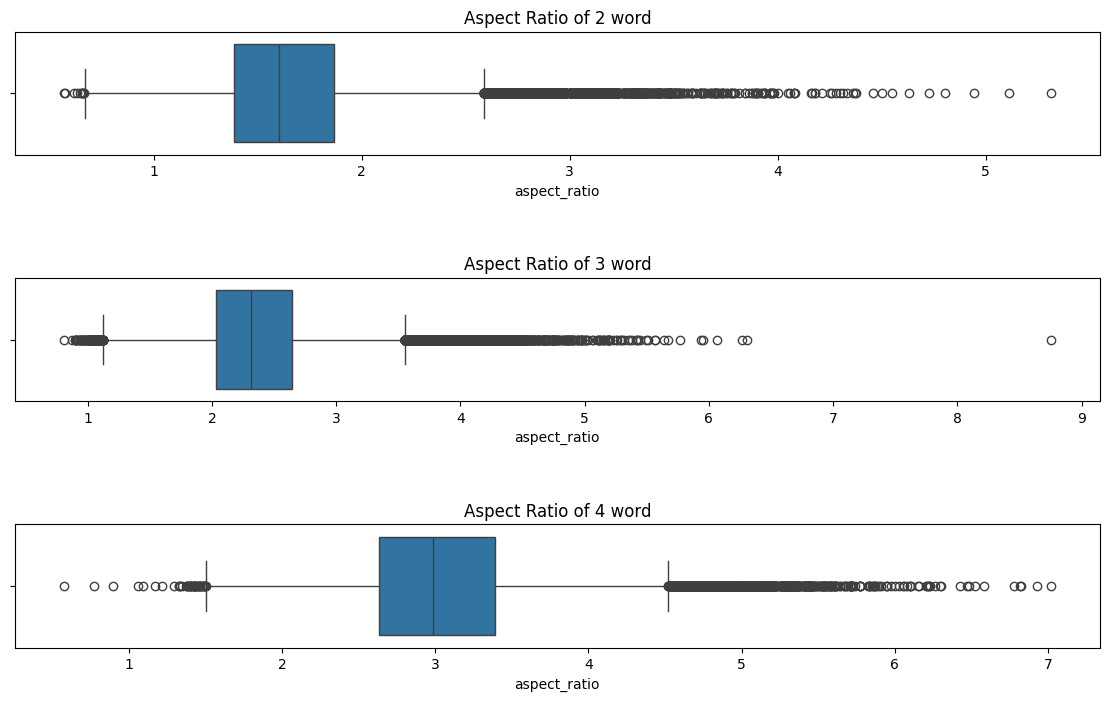

In [7]:
f, ax = plt.subplots(3, 1, figsize=(14, 8))

word_len = [2, 3, 4]
for i, len in enumerate(word_len) :
    sns.boxplot(word_data[word_data['word_len'] == len]['aspect_ratio'], ax=ax[i], orient='h')
    ax[i].set_title('Aspect Ratio of ' + str(len) + ' word')

plt.subplots_adjust(hspace=1)
plt.show()

# 이상치 개수 알아보기

IQR 방법을 사용하여 이상치를 제거 (Q1 - 1.5 * IQR 보다 작거나 Q3 + 1.5 * IQR 보다 큰 값)

In [8]:
outlier_range = {
    2: (0.663461538461538, 2.586538461538462),
    3: (1.1271777003484322, 3.552264808362369),
    4: (1.502555824589723, 4.522195318805488)
}

In [9]:
def is_outlier(row) :
    cur_IQR_range = outlier_range[row['word_len']]
    if row['aspect_ratio'] < cur_IQR_range[0] or row['aspect_ratio'] > cur_IQR_range[1] :
        return True
    else :
        return False

In [10]:
word_data['is_outlier'] = word_data.apply(is_outlier, axis=1)

In [13]:
data_count = word_data.shape[0]
outlier_count = word_data[word_data['is_outlier'] == True].shape[0]

print('전체 데이터 개수:', data_count)
print('이상치 개수:', outlier_count)
print('이상치 비율: {:.3f}%'.format(outlier_count / data_count * 100))

전체 데이터 개수: 462893
이상치 개수: 9039
이상치 비율: 1.953%


TODO
* 각 단어별 이미지 정규화
* 라벨링 데이터 만들기

In [14]:
word_data.head()

,image_file_name,sex,age,age_range,word,word_len,width,height,aspect_ratio,is_outlier
0,IMG_OCR_53_4PR_09305_1.png,female,41,40s,강원도,3,186,66,2.818182,False
1,IMG_OCR_53_4PR_09305_2.png,female,41,40s,경상북도,4,235,69,3.405797,False
2,IMG_OCR_53_4PR_09305_3.png,female,41,40s,경기도,3,181,62,2.919355,False
3,IMG_OCR_53_4PR_09305_4.png,female,41,40s,인제군,3,157,64,2.453125,False
4,IMG_OCR_53_4PR_09305_5.png,female,41,40s,영광군,3,162,65,2.492308,False


In [15]:
word_data.to_csv('word_data_with_size_outlier.csv', encoding = 'utf-8', index = False)